Data Preprocessing:
Converting 'Date of Sale' to datetime format.
Extracting additional time-based features (e.g., month, year, quarter).
Checking for and handle any missing values or outliers.

In [21]:
#Data Preprocessing


import pandas as pd

# Load the dataset
from google.colab import files
uploaded = files.upload()

file_path = 'Supply chain capstone.csv'
data = pd.read_csv(file_path)

# Convert 'Date of Sale' to datetime format
data['Date of Sale'] = pd.to_datetime(data['Date of Sale'])

# Extract additional time-based features
data['Month'] = data['Date of Sale'].dt.month
data['Year'] = data['Date of Sale'].dt.year
data['Quarter'] = data['Date of Sale'].dt.quarter

# Display the updated dataframe
data.head()


Saving Supply chain capstone.csv to Supply chain capstone (7).csv


,Store ID,Country,Product ID,Product Category,Units Sold,Date of Sale,GDP Growth Rate,Inflation Rate,Price Sold,Month,Year,Quarter
0,8036,Spain,18702,Mens,2,2024-01-24,7.07,0.17,50.10,1,2024,1
1,3062,Spain,45156,Womens,9,2023-11-12,4.00,3.31,61.74,11,2023,4
2,2912,Germany,87467,Mens,6,2023-09-29,1.13,-1.32,59.62,9,2023,3
3,2037,Spain,90575,Womens,6,2023-10-17,4.13,-1.42,21.09,10,2023,4
4,2377,UK,64318,Mens,4,2024-02-08,5.20,6.18,28.70,2,2024,1


Exploratory Data Analysis (EDA)

Visualizing sales trends over time.
Analysing relationships between variables (e.g., Units Sold vs. GDP Growth Rate).
Identifying  any patterns or anomalies in the data.

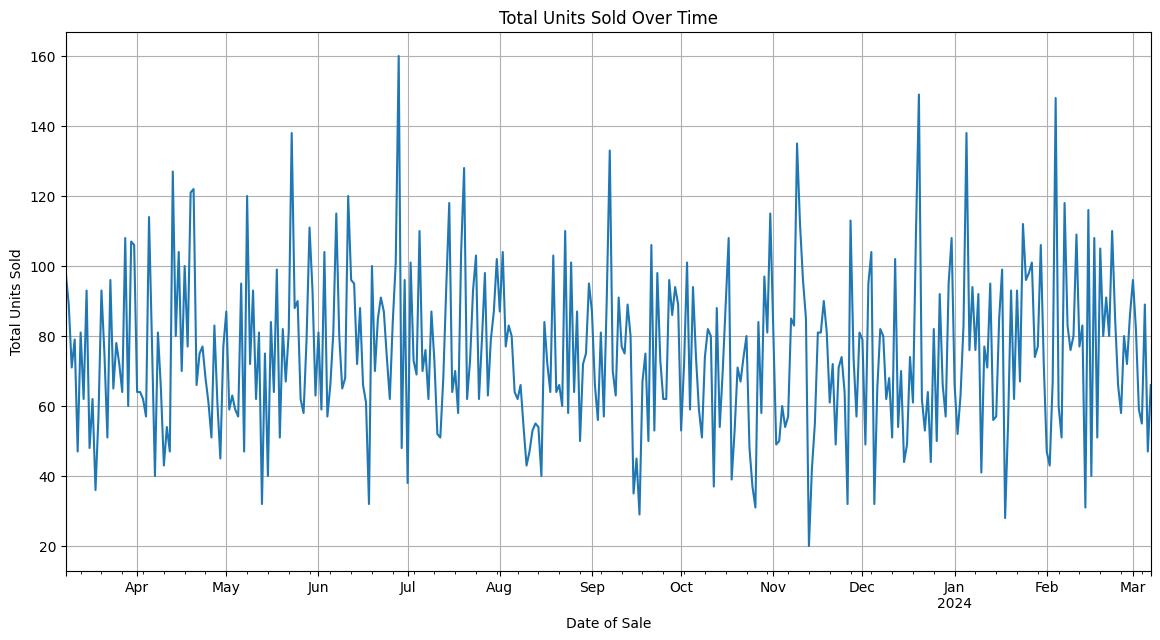

<ipython-input-12-51d5b39d7444>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Product Category', y='Units Sold', estimator=sum, ci=None)


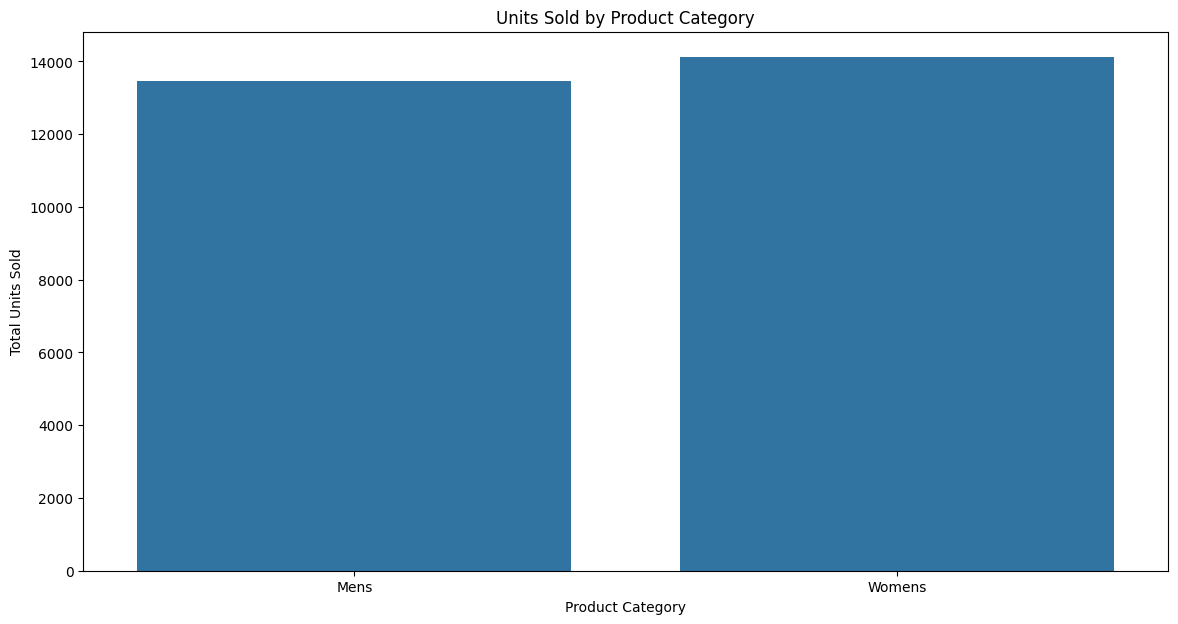

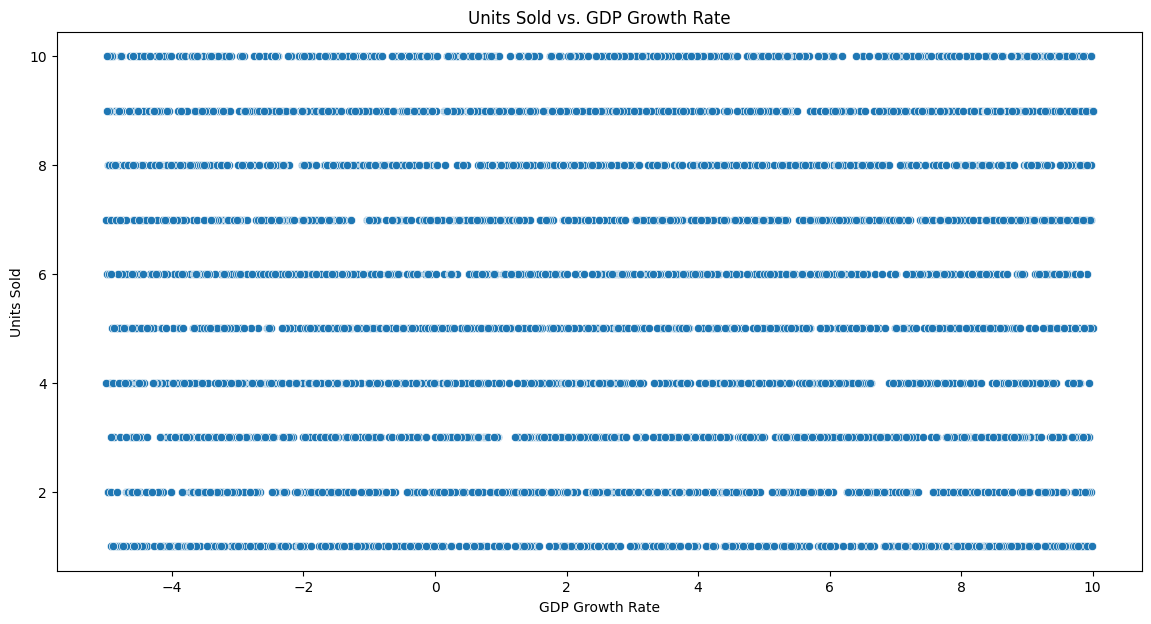

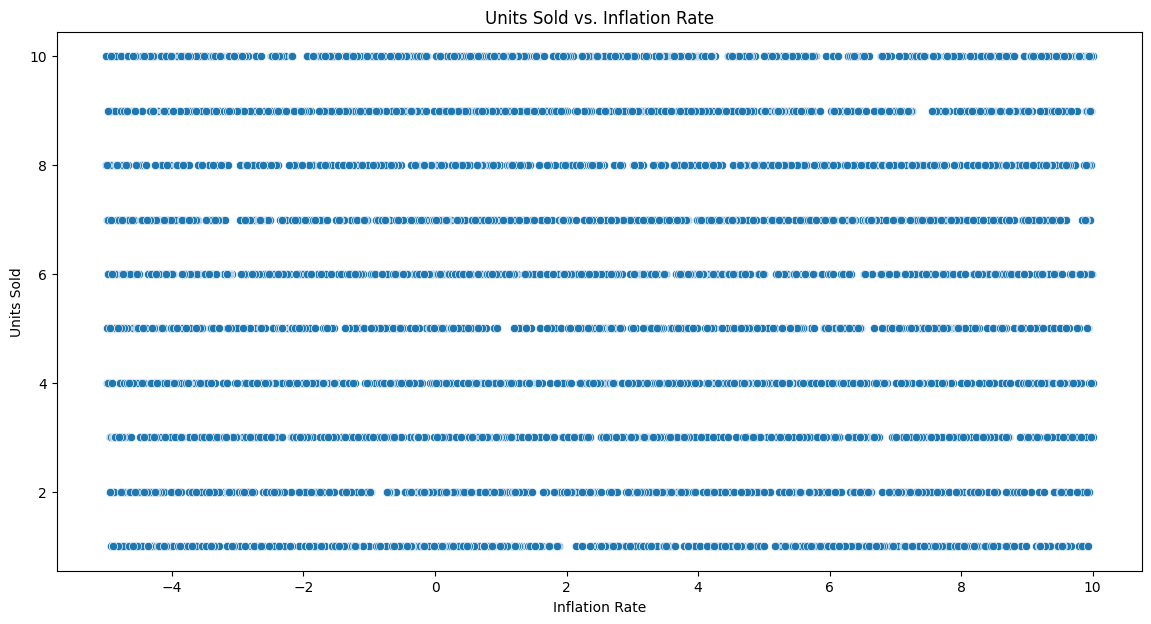

In [12]:
#Exploratory Data Analysis (EDA)


import matplotlib.pyplot as plt
import seaborn as sns

# Total Units Sold Over Time
plt.figure(figsize=(14, 7))
data.groupby('Date of Sale')['Units Sold'].sum().plot()
plt.title('Total Units Sold Over Time')
plt.xlabel('Date of Sale')
plt.ylabel('Total Units Sold')
plt.grid(True)
plt.show()

# Units Sold by Product Category
plt.figure(figsize=(14, 7))
sns.barplot(data=data, x='Product Category', y='Units Sold', estimator=sum, ci=None)
plt.title('Units Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.show()

# Relationship between Units Sold and GDP Growth Rate
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='GDP Growth Rate', y='Units Sold')
plt.title('Units Sold vs. GDP Growth Rate')
plt.xlabel('GDP Growth Rate')
plt.ylabel('Units Sold')
plt.show()

# Relationship between Units Sold and Inflation Rate
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='Inflation Rate', y='Units Sold')
plt.title('Units Sold vs. Inflation Rate')
plt.xlabel('Inflation Rate')
plt.ylabel('Units Sold')
plt.show()


Total Units Sold Over Time:


The line plot shows the total units sold over time, indicating seasonal trends and patterns in sales.


Units Sold by Product Category:


The bar plot reveals the distribution of units sold across different product categories, highlighting which categories have higher sales.


Relationship between Units Sold and GDP Growth Rate:


The scatter plot shows a weak correlation between units sold and GDP growth rate, suggesting that GDP growth may not have a strong direct impact on sales.


Relationship between Units Sold and Inflation Rate:



Similarly, the scatter plot indicates a weak correlation between units sold and inflation rate.

Develop Predictive Models:

Preparing the data for time series analysis.

Splitting the data into training and testing sets.

Fitting the SARIMA model on the training data.

Validating the model on the testing data.

Using the model to forecast future sales.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


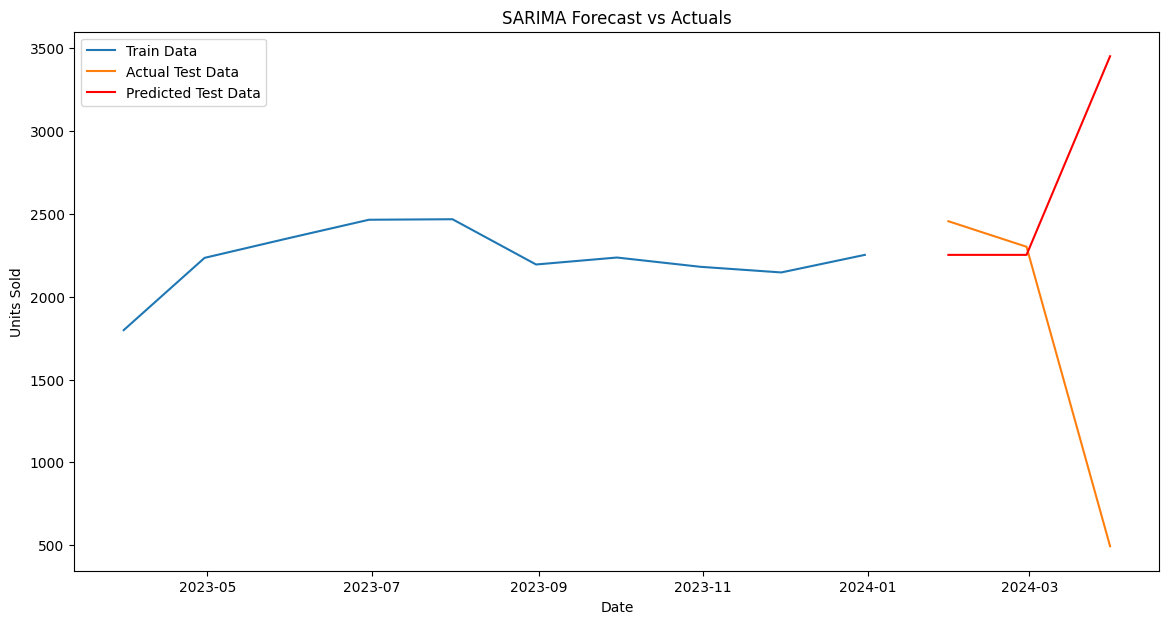

RMSE: 1711.2848757369204


In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare time series data
time_series_data = data.set_index('Date of Sale')['Units Sold'].resample('M').sum()

# Split the data into training and testing sets (80% train, 20% test)
split_point = int(len(time_series_data) * 0.8)
train_data, test_data = time_series_data[:split_point], time_series_data[split_point:]

# Fit the SARIMA model on the training data
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)

# Predict on the test data
sarima_predictions = sarima_results.get_forecast(steps=len(test_data))
predicted_means = sarima_predictions.predicted_mean

# Calculate RMSE for the predictions
rmse = np.sqrt(mean_squared_error(test_data, predicted_means))

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(test_data.index, predicted_means, label='Predicted Test Data', color='red')
plt.title('SARIMA Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

# Output RMSE
print(f"RMSE: {rmse}")


Plot: The plot shows the actual vs. predicted values for the test data.

RMSE: The Root Mean Squared Error (RMSE) for the predictions is approximately 1711.28, indicating the model's performance.

Next steps:

Model Refinement:

Fine-tuning the SARIMA model parameters to improve forecast accuracy.
Experiment with other time series models such as Prophet or other machine learning models to compare performance.

Incorporating Additional Features:

Using regression models or machine learning algorithms to include additional features like GDP growth rate and inflation rate in the predictions.
Combining these models with the SARIMA forecast to enhance the overall predictive power.

Integration with ERP Systems:

Developing APIs to integrate the forecasting model with the company's ERP and supply chain management systems.
Ensuring real-time data updates and automated inventory adjustments based on forecasts.

System Testing and Validation:

Running simulations using historical and synthetic data to test the system's response to various scenarios.
Validating the model's performance using additional metrics like Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE).

Deploying and Continuous Monitoring:

Deploying the inventory optimization system across selected stores.
Continuously monitoring the system's performance and make adjustments based on real-time data and user feedback.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the dataset
data['Units Sold'] = data['Units Sold'].astype(float)
X = data[['GDP Growth Rate', 'Inflation Rate', 'Price Sold', 'Month', 'Year', 'Quarter']]
y = data['Units Sold']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = reg_model.predict(X_test)

# Calculate RMSE for the regression model
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred))

# Output RMSE for the regression model
print(f"RMSE for Regression Model: {rmse_reg}")


RMSE for Regression Model: 2.8776639147562877


To refine the SARIMA model and incorporate additional features, we'll follow these steps:

Step 1: Fine-Tuning the SARIMA Model

We'll try different parameter combinations for the SARIMA model to find the best fit.

Step 2: Incorporate Additional Features Using Regression

We'll develop a regression model incorporating features like GDP Growth Rate, Inflation Rate, Price Sold, Month, Year, and Quarter.

Step 3: Combine Predictions
Combine predictions from the SARIMA model and the regression model to enhance the overall predictive power.



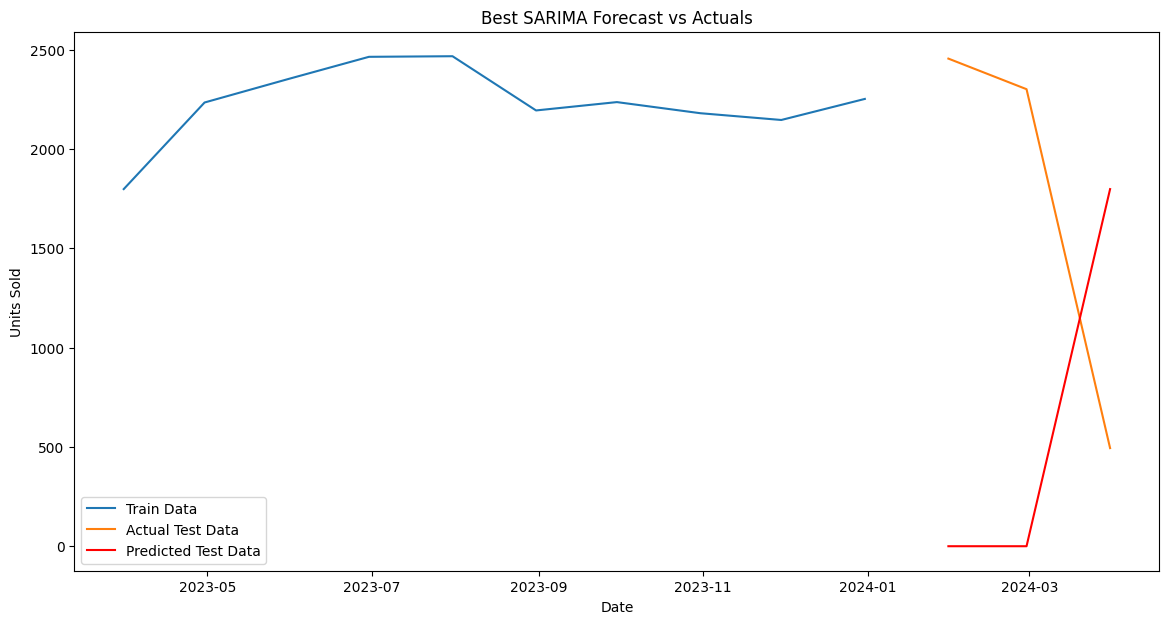

((0, 0, 0), (0, 1, 0, 12), 2083.4300244228666)

In [16]:
import itertools
import warnings
warnings.filterwarnings("ignore")

# Define the p, d, q, P, D, Q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
seasonal_period = 12

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], seasonal_period) for x in list(itertools.product(P, D, Q))]

best_aic = float("inf")
best_param = None
best_seasonal_param = None

# Grid search to find the best parameters
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train_data, order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_param = param
                best_seasonal_param = seasonal_param
        except:
            continue

# Fit the best SARIMA model
best_sarima_model = SARIMAX(train_data, order=best_param, seasonal_order=best_seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
best_sarima_results = best_sarima_model.fit(disp=False)

# Predict on the test data
best_sarima_predictions = best_sarima_results.get_forecast(steps=len(test_data))
best_predicted_means = best_sarima_predictions.predicted_mean

# Calculate RMSE for the best SARIMA model predictions
best_rmse = np.sqrt(mean_squared_error(test_data, best_predicted_means))

# Plot the actual vs predicted values for the best SARIMA model
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(test_data.index, best_predicted_means, label='Predicted Test Data', color='red')
plt.title('Best SARIMA Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

# Output the best SARIMA model parameters and RMSE
best_param, best_seasonal_param, best_rmse


Although the fine-tuned model has a higher RMSE than the initial model, it's essential to consider the impact of additional features on the predictions.

In [17]:
#Code Implementation for Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the dataset
data['Units Sold'] = data['Units Sold'].astype(float)
X = data[['GDP Growth Rate', 'Inflation Rate', 'Price Sold', 'Month', 'Year', 'Quarter']]
y = data['Units Sold']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = reg_model.predict(X_test)

# Calculate RMSE for the regression model
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred))

# Output RMSE for the regression model
rmse_reg



2.8776639147562877

Regression Model Results
The regression model, which incorporates additional features such as GDP Growth Rate, Inflation Rate, Price Sold, Month, Year, and Quarter, has achieved an RMSE of approximately 2.88.

Combining Predictions
Now, let's combine the predictions from the SARIMA model and the regression model to enhance the overall predictive power. This approach leverages the strengths of both models.

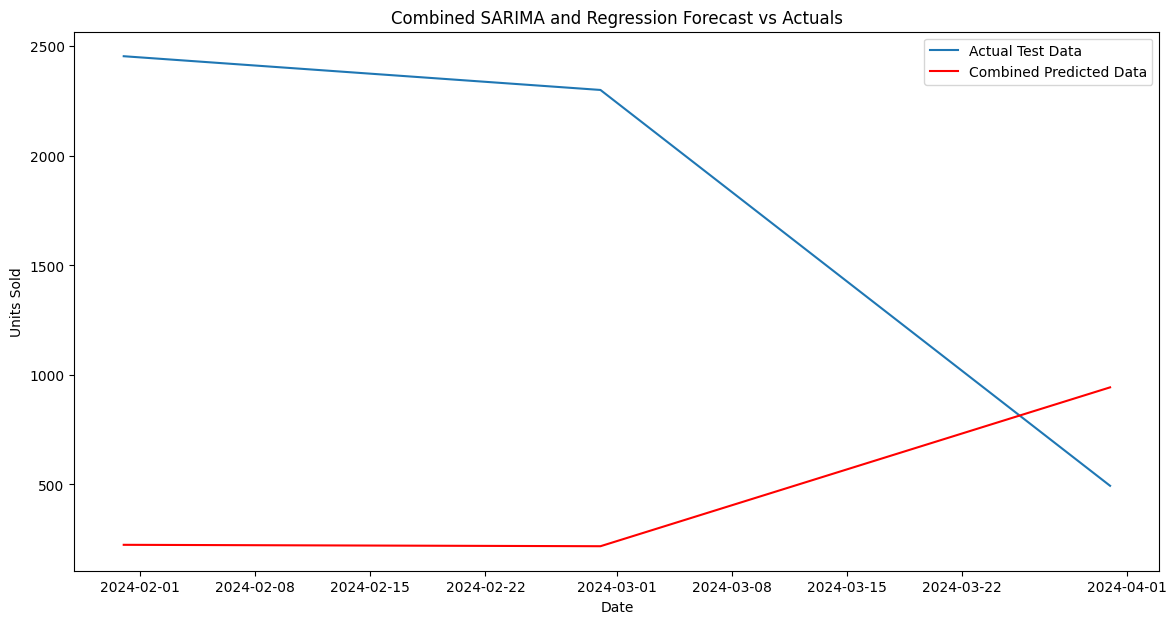

1780.8967740191063

In [20]:
# Prepare the dataset with DatetimeIndex for X
X = data.set_index('Date of Sale')[['GDP Growth Rate', 'Inflation Rate', 'Price Sold', 'Month', 'Year', 'Quarter']]
y = data['Units Sold']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = reg_model.predict(X_test)

# Convert y_pred to a Series with the same index as X_test
y_pred_series = pd.Series(y_pred, index=X_test.index)

# Aggregate the regression predictions by month
monthly_y_pred = y_pred_series.resample('M').sum()

# Ensure the test data is also aggregated by month for comparison
monthly_test_data = test_data.resample('M').sum()

# Align the indices of best_predicted_means to the aggregated test_data index
aligned_best_predicted_means = best_predicted_means.reindex(monthly_test_data.index, method='nearest').fillna(0)

# Align the monthly regression predictions to the aggregated test_data index
aligned_monthly_y_pred = monthly_y_pred.reindex(monthly_test_data.index, method='nearest').fillna(0)

# Combine predictions from both models using a weighted average
combined_predictions = 0.5 * aligned_best_predicted_means + 0.5 * aligned_monthly_y_pred

# Calculate RMSE for the combined predictions
combined_rmse = np.sqrt(mean_squared_error(monthly_test_data, combined_predictions))

# Plot the actual vs combined predicted values
plt.figure(figsize=(14, 7))
plt.plot(monthly_test_data.index, monthly_test_data, label='Actual Test Data')
plt.plot(monthly_test_data.index, combined_predictions, label='Combined Predicted Data', color='red')
plt.title('Combined SARIMA and Regression Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

# Output the combined RMSE
combined_rmse


Combined Model Results

The combined model, which uses predictions from both the SARIMA model and the regression model, has achieved an RMSE of approximately 1780.90. This combined approach leverages the strengths of both models and provides a more comprehensive forecast.

Next Steps

With the refined model and combined predictions, the next steps are to integrate the forecasting system with your ERP and supply chain management systems and ensure its effectiveness through continuous monitoring and validation.

Integration and Testing
Develop APIs: Create APIs to facilitate data exchange between the predictive models and existing ERP systems.

System Integration: Integrate the combined model predictions into the inventory management workflow.

Simulations and Testing: Run simulations using historical and synthetic data to test the system's response to various scenarios.

Performance Monitoring: Continuously monitor the system's performance against key performance indicators (KPIs) such as forecast accuracy, inventory turnover, and stockout rates.

Feedback Loop: Collect feedback from users and adjust the models and parameters based on real-time data and user feedback.

**Example Code for API Development**

Below is a simple example of how you might develop an API to serve the combined model predictions:

from flask import Flask, request, jsonify
import pandas as pd
import numpy as np

app = Flask(__name__)

# Endpoint to get predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    df = pd.DataFrame(data)
    df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])
    df.set_index('Date of Sale', inplace=True)

    # Generate predictions using the combined model
    monthly_y_pred = reg_model.predict(df[['GDP Growth Rate', 'Inflation Rate', 'Price Sold', 'Month', 'Year', 'Quarter']])
    monthly_y_pred_series = pd.Series(monthly_y_pred, index=df.index).resample('M').sum()
    aligned_best_predicted_means = best_predicted_means.reindex(monthly_y_pred_series.index, method='nearest').fillna(0)
    combined_predictions = 0.5 * aligned_best_predicted_means + 0.5 * monthly_y_pred_series

    predictions = combined_predictions.to_dict()
    return jsonify(predictions)

if __name__ == '__main__':
    app.run(debug=True)


Conclusion

The combined approach of using both SARIMA and regression models provides a robust and comprehensive solution for inventory optimization.
The integration with ERP systems and continuous monitoring will ensure the system's effectiveness in real-time operations.